# Prepare Data

In [27]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import subset_df, plot_in_fig

In [28]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected /yunity/arusty/Graph-Manifold-Alignment/ManifoldData/S-curve/Base_Line_Scores(N7172)_AP(0.05-0.1-0.15-0.2-0.3-0.5)_47.npy
#tma.clear_directory(text_curater="merge", not_text = "42")

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

'Clear Directory'

In [10]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="seeds.csv", split= "even", percent_of_anchors= [0.05, 0.1, 0.15, 0.2, 0.5], verbose=2, random_state= 1738)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests()
#test.run_CSPUD_tests()
#test.run_DIG_tests(predict = False)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#test.run_MAGAN_tests()
#test.run_KNN_tests()
#test.run_JLMA_tests()
#test.run_PCR_tests()
#test.run_DIG_Conections_tests(page_ranks=["None"], predict = False)


 
 
---------------------------       Initalizing class with seeds.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (199, 4)
Split B Features shape (199, 3)
MDS initialized with 3 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [11]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

In [12]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

/tmp/ipykernel_2952828/826384132.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


In [13]:
df[df["csv_file"] == "blobs"].sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
849080,blobs,DIG,1738,even,16.0,0.05,0.5,full,2.560481,NaN,NaN,0.224067,0.826667,0.577778,0.711111,0.602600
727475,blobs,SPUD,7667,even,9.0,0.03,0.3,NaN,NaN,abs,merge,0.000000,0.963333,0.666667,0.633333,0.963333
862741,blobs,DIG,9971,even,44.0,0.13,0.3,None,2.559908,NaN,NaN,0.297022,0.770000,0.777778,0.588889,0.472978
702571,blobs,SSMA,4287,even,2.0,0.01,0.2,NaN,NaN,NaN,NaN,0.483063,0.527778,0.644444,0.600000,0.044715
747968,blobs,SPUD,9515,even,51.0,0.15,0.1,NaN,NaN,abs,pure,0.377789,0.616667,0.711111,0.666667,0.238878


In [14]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

/yunity/arusty/Graph-Manifold-Alignment/Python_Files/utils.py:315: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 1409906


 Method        Lengths
--------      ----------
 JLMA:          76770
 CwDIG:          267830
 MAGAN:          2194
 SSMA:          60100
 DTA:          60290
 Nama:          4362
 SPUD:          538460
 DIG:          364140


----------------------       Splits      ----------------------
Total data of random: 264466

 random        Lengths
--------      ----------
 MAGAN:          1248
 SSMA:          12480
 CwDIG:          38450
 JLMA:          12480
 DTA:          12480
 Nama:          1248
 SPUD:          102760
 DIG:          70840


Total data of even: 532314

 even        Lengths
--------      ----------
 MAGAN:          190
 SSMA:          20160
 CwDIG:          111000
 JLMA:          23730
 DTA:          20350
 Nama:          364
 SPUD:          197240
 DIG:   

In [15]:
# Just a safety inspection -> Checking to ensure we are not testing random seeds unfairly against each other
grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "distort").groupby(['seed']).agg(
    csv_count=('csv_file', 'nunique'),   # Count occurrences of each seed
    method_count=('method', 'nunique')  # Count unique methods using each seed
).reset_index()

grouped["seed"].values

/tmp/ipykernel_2952828/1272873641.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  grouped = subset_df(df[df["csv_file"] != "blobs"][df["csv_file"] != "S-curve"], split = "distort").groupby(['seed']).agg(


array([  17,   81,  203,  381,  410,  581,  654,  695,  726,  870,  956,
       1039, 1075, 1087, 1168, 1349, 1401, 1425, 1547, 1680, 1709, 1738,
       1819, 1822, 1825, 1847, 1848, 2009, 2100, 2225, 2277, 2287, 2446,
       2830, 2969, 2973, 2986, 3154, 3183, 3211, 3246, 3293, 3325, 3328,
       3329, 3340, 3346, 3347, 3407, 3430, 3495, 3658, 3671, 3698, 4013,
       4063, 4278, 4390, 4461, 4507, 4525, 4557, 4767, 4798, 4822, 4893,
       4898, 4949, 5003, 5187, 5198, 5259, 5396, 5530, 5616, 5695, 5716,
       5823, 5934, 5945, 5959, 5989, 6000, 6133, 6148, 6176, 6189, 6195,
       6210, 6225, 6410, 6445, 6517, 6616, 6639, 6648, 6649, 6663, 6671,
       6729, 6739, 6913, 6950, 6974, 6983, 7111, 7153, 7172, 7180, 7201,
       7205, 7269, 7338, 7393, 7394, 7546, 7654, 7665, 7667, 7767, 7827,
       7878, 7920, 7959, 8021, 8036, 8177, 8191, 8339, 8353, 8429, 8438,
       8452, 8469, 8582, 8584, 8597, 8605, 8624, 8779, 8858, 8936, 8960,
       8963, 8965, 9020, 9083, 9095, 9128, 9179, 93

In [16]:
grouped#["method_count", "seeds"]

,seed,csv_count,method_count
0,17,1,5
1,81,1,5
2,203,2,5
3,381,1,5
4,410,26,2
...,...,...,...
164,9941,1,5
165,9955,1,5
166,9958,1,5
167,9971,2,5


# Visualization Tests

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

Secondly, MAGAN FOSCTTM is alway very low

In [17]:
df.columns

Index(['csv_file', 'method', 'seed', 'split', 'KNN', 'Percent_of_KNN',
       'Percent_of_Anchors', 'Page_Rank', 'Predicted_Feature_MAE', 'Operation',
       'SPUDS_Algorithm', 'FOSCTTM', 'Cross_Embedding_KNN',
       'A_Classification_Score', 'B_Classification_Score', 'Combined_Metric'],
      dtype='object')

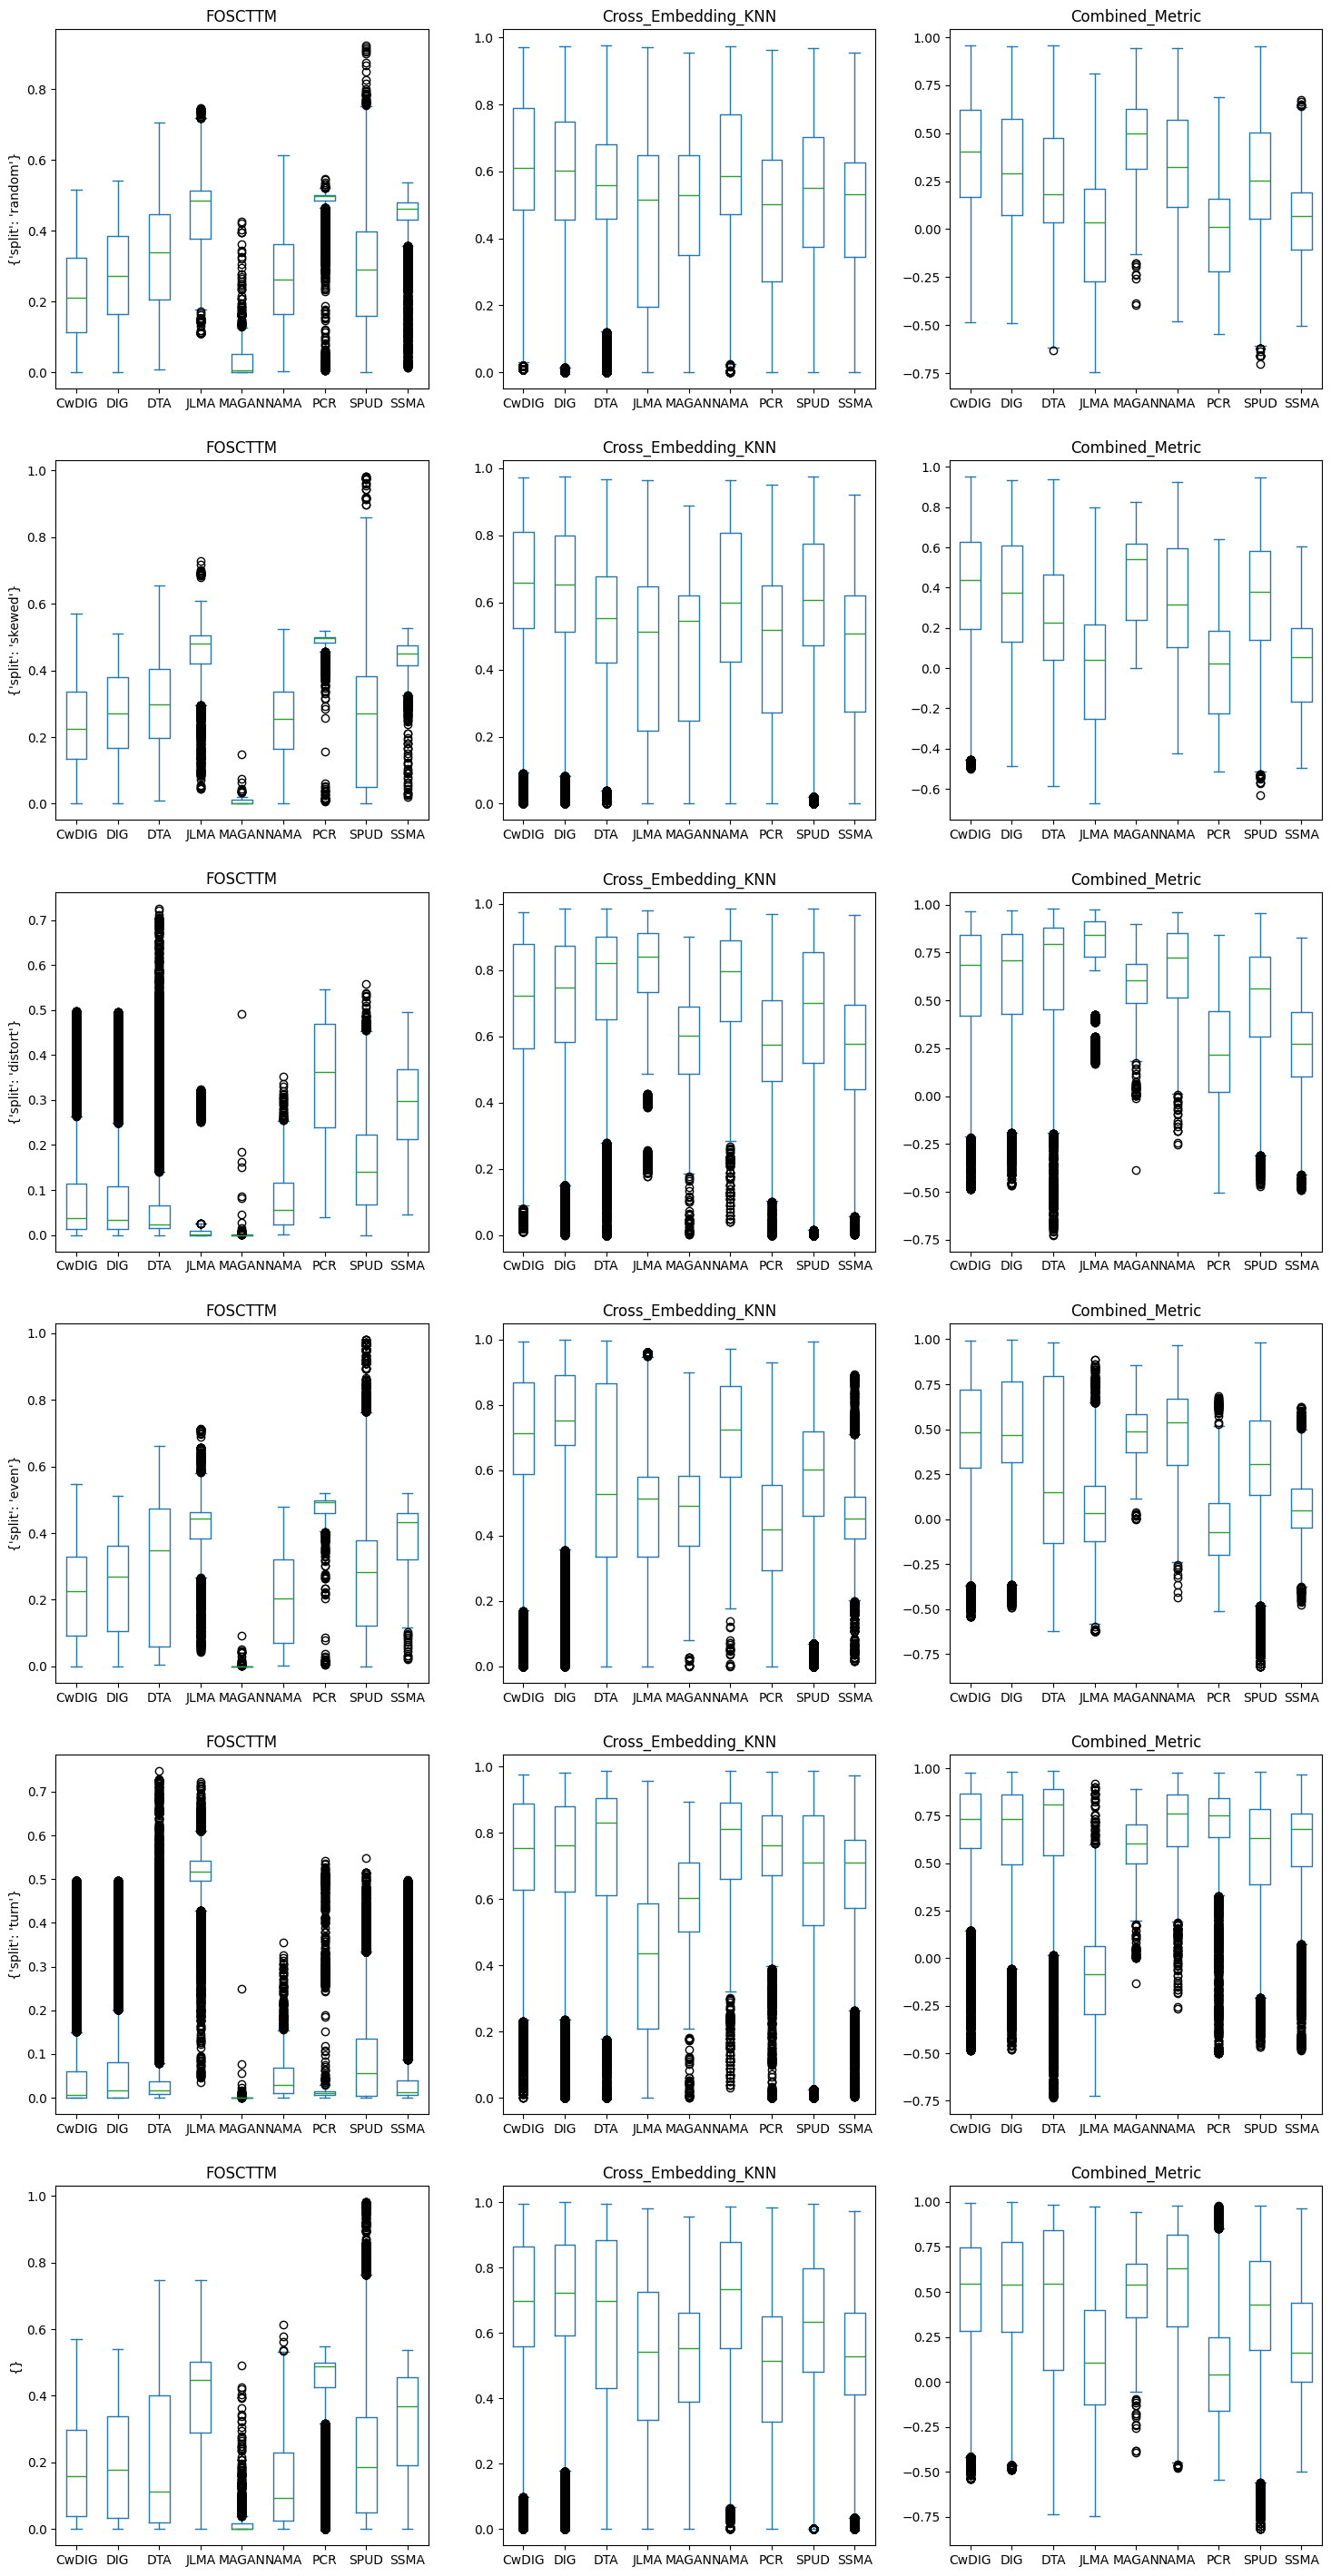

In [18]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         },
         {}]

plot_in_fig(df = df, columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [19]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [20]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
1133263,glass,DIG,1825,even,17.0,0.07,0.20,off-diagonal,0.107478,NaN,NaN,0.196284,0.495327,NaN,NaN,0.299044
742457,blobs,DIG,9515,even,2.0,0.01,0.30,full,2.575085,NaN,NaN,0.353211,0.653333,0.711111,0.655556,0.300122
640473,crx,DIG,7667,even,58.0,0.09,0.15,None,0.275114,NaN,NaN,0.286756,0.838855,NaN,NaN,0.552100
751030,blobs,DIG,2830,even,16.0,0.05,0.10,None,2.527261,NaN,NaN,0.361778,0.670000,0.644444,0.744444,0.308222
948137,Cancer_Data,DIG,5198,skewed,110.0,0.19,0.05,None,0.085525,NaN,NaN,0.229833,0.936731,0.947368,0.947368,0.706898


/yunity/arusty/Graph-Manifold-Alignment/Python_Files/utils.py:176: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


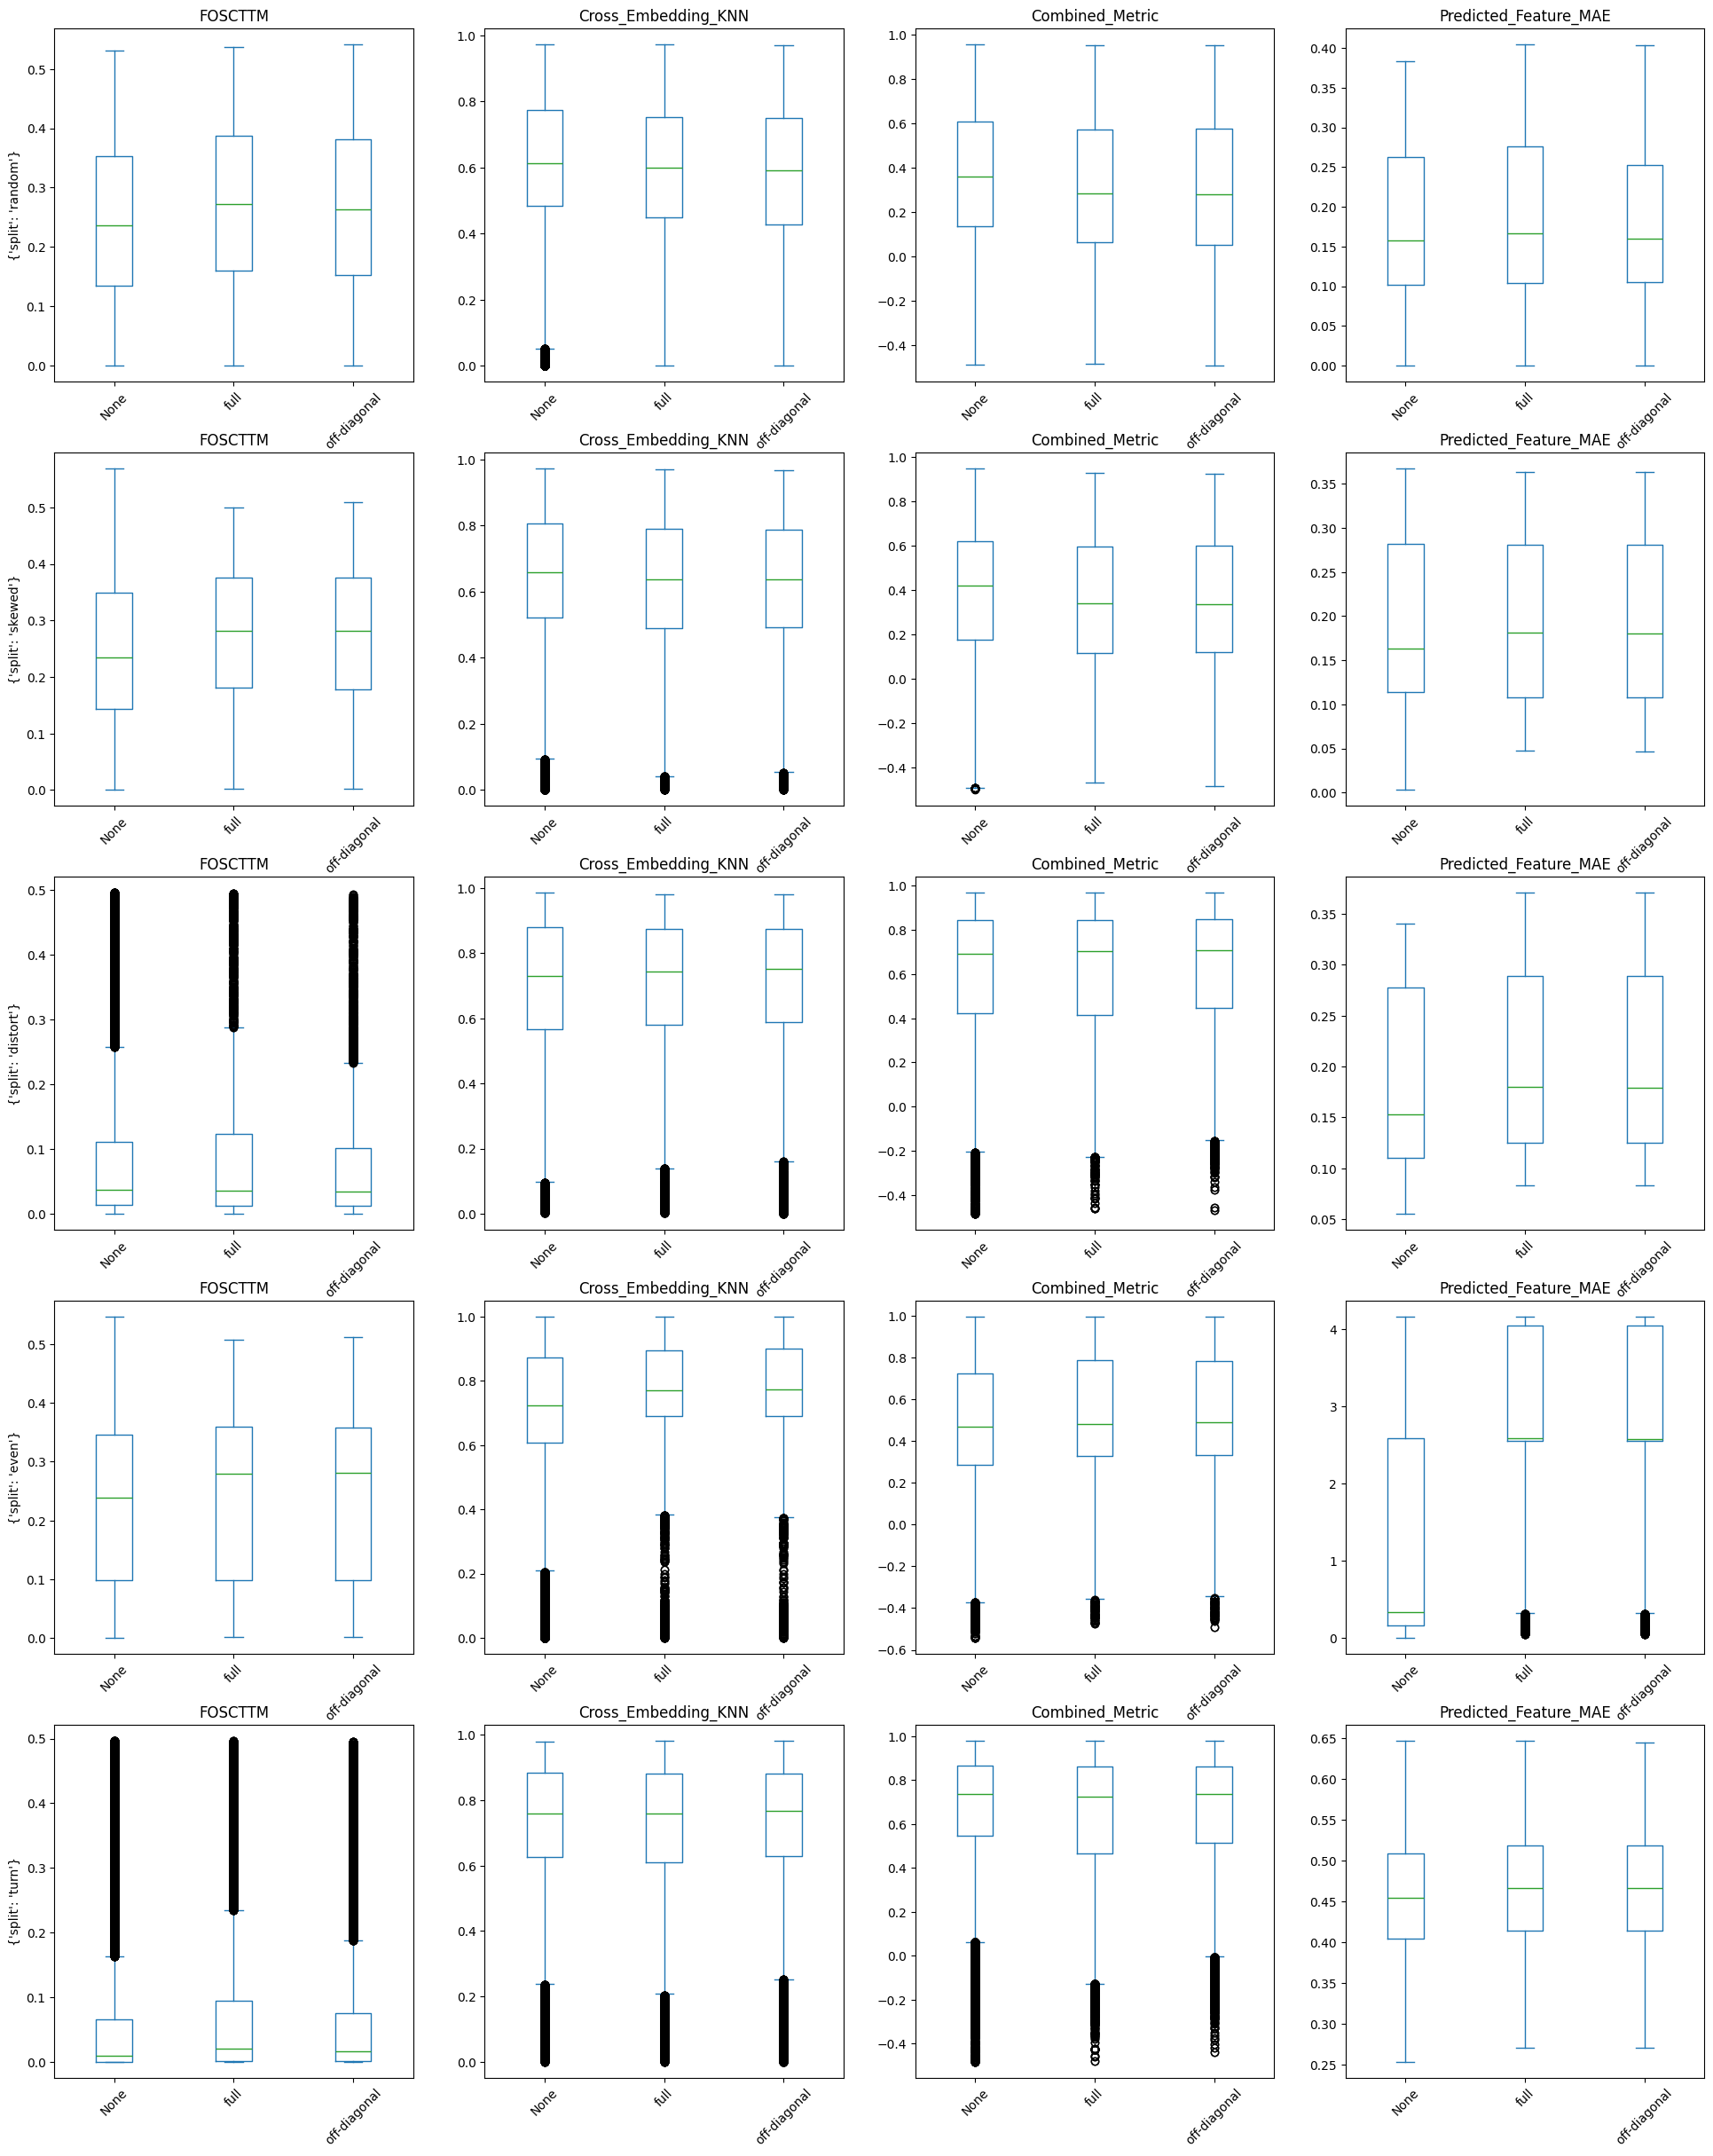

In [21]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

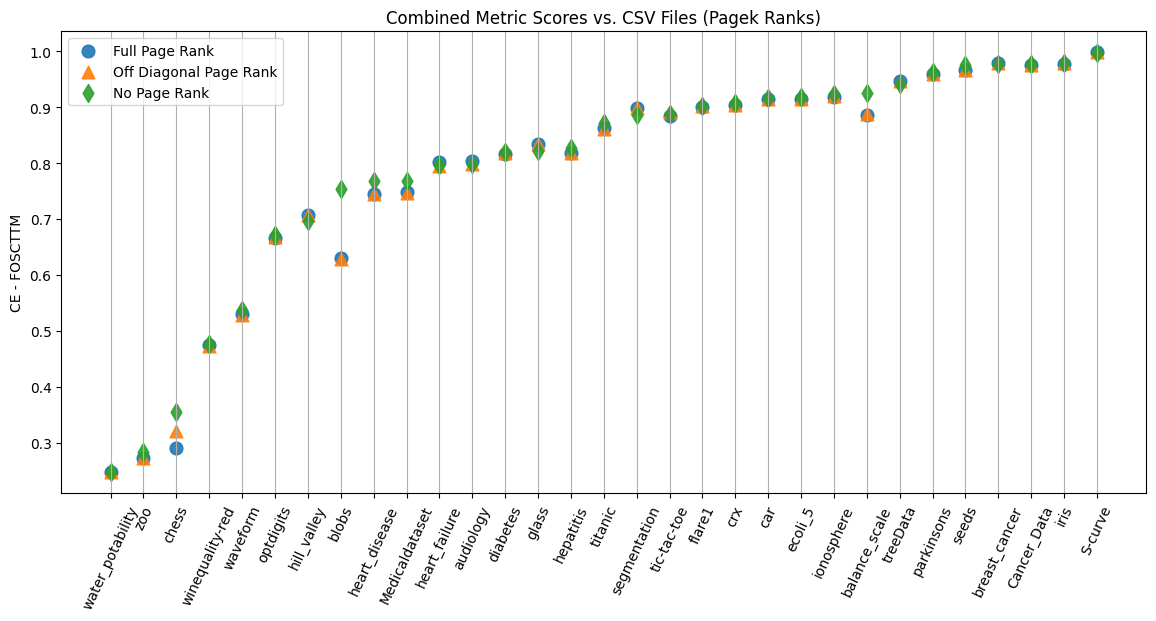

In [22]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

In [23]:
subset_df(df, method = "CwDIG")[10:20]

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
151,heart_disease,CwDIG,2969,skewed,8.0,0.03,0.15,None,0.285098,0.2,NaN,0.345084,0.545455,0.566667,0.566667,0.200371
152,heart_disease,CwDIG,2969,skewed,8.0,0.03,0.50,None,0.285899,0.2,NaN,0.165289,0.552189,0.566667,0.566667,0.386899
153,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.05,None,0.282736,0.2,NaN,0.394126,0.508418,0.588889,0.555556,0.114291
154,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.10,None,0.284001,0.2,NaN,0.394603,0.518519,0.588889,0.555556,0.123916
155,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.30,None,0.284350,0.2,NaN,0.261799,0.501684,0.588889,0.555556,0.239885
156,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.20,None,0.287206,0.2,NaN,0.302792,0.562290,0.588889,0.555556,0.259497
157,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.15,None,0.289690,0.2,NaN,0.372847,0.535354,0.588889,0.555556,0.162506
158,heart_disease,CwDIG,2969,skewed,14.0,0.05,0.50,None,0.287027,0.2,NaN,0.191143,0.562290,0.588889,0.555556,0.371147
159,heart_disease,CwDIG,2969,skewed,20.0,0.07,0.05,None,0.284657,0.2,NaN,0.405531,0.498316,0.577778,0.588889,0.092785
160,heart_disease,CwDIG,2969,skewed,20.0,0.07,0.10,None,0.285391,0.2,NaN,0.401314,0.555556,0.577778,0.588889,0.154242


### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

In [24]:
subset_df(df, Operation = "abs")

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,A_Classification_Score,B_Classification_Score,Combined_Metric
803,heart_disease,SPUD,5198,random,2.0,0.01,0.05,NaN,NaN,abs,pure,0.468875,0.461279,0.622222,0.444444,-0.007596
804,heart_disease,SPUD,5198,random,2.0,0.01,0.10,NaN,NaN,abs,pure,0.434593,0.491582,0.622222,0.444444,0.056990
805,heart_disease,SPUD,5198,random,2.0,0.01,0.30,NaN,NaN,abs,pure,0.327982,0.484848,0.622222,0.444444,0.156866
806,heart_disease,SPUD,5198,random,2.0,0.01,0.20,NaN,NaN,abs,pure,0.375665,0.471380,0.622222,0.444444,0.095716
807,heart_disease,SPUD,5198,random,2.0,0.01,0.15,NaN,NaN,abs,pure,0.408076,0.488215,0.622222,0.444444,0.080139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408911,S-curve,SPUD,3430,even,47.0,0.19,0.50,NaN,NaN,abs,merge,0.000000,0.440000,0.633333,0.916667,0.440000
1408912,S-curve,SPUD,3430,even,47.0,0.19,0.50,NaN,NaN,abs,merge,0.000000,0.440000,0.700000,0.983333,0.440000
1408913,S-curve,SPUD,3430,even,47.0,0.19,0.50,NaN,NaN,abs,merge,0.000000,0.440000,0.866667,0.966667,0.440000
1408914,S-curve,SPUD,3430,even,47.0,0.19,0.50,NaN,NaN,abs,merge,0.000000,0.440000,0.750000,1.000000,0.440000


/tmp/ipykernel_2952828/1399079137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]


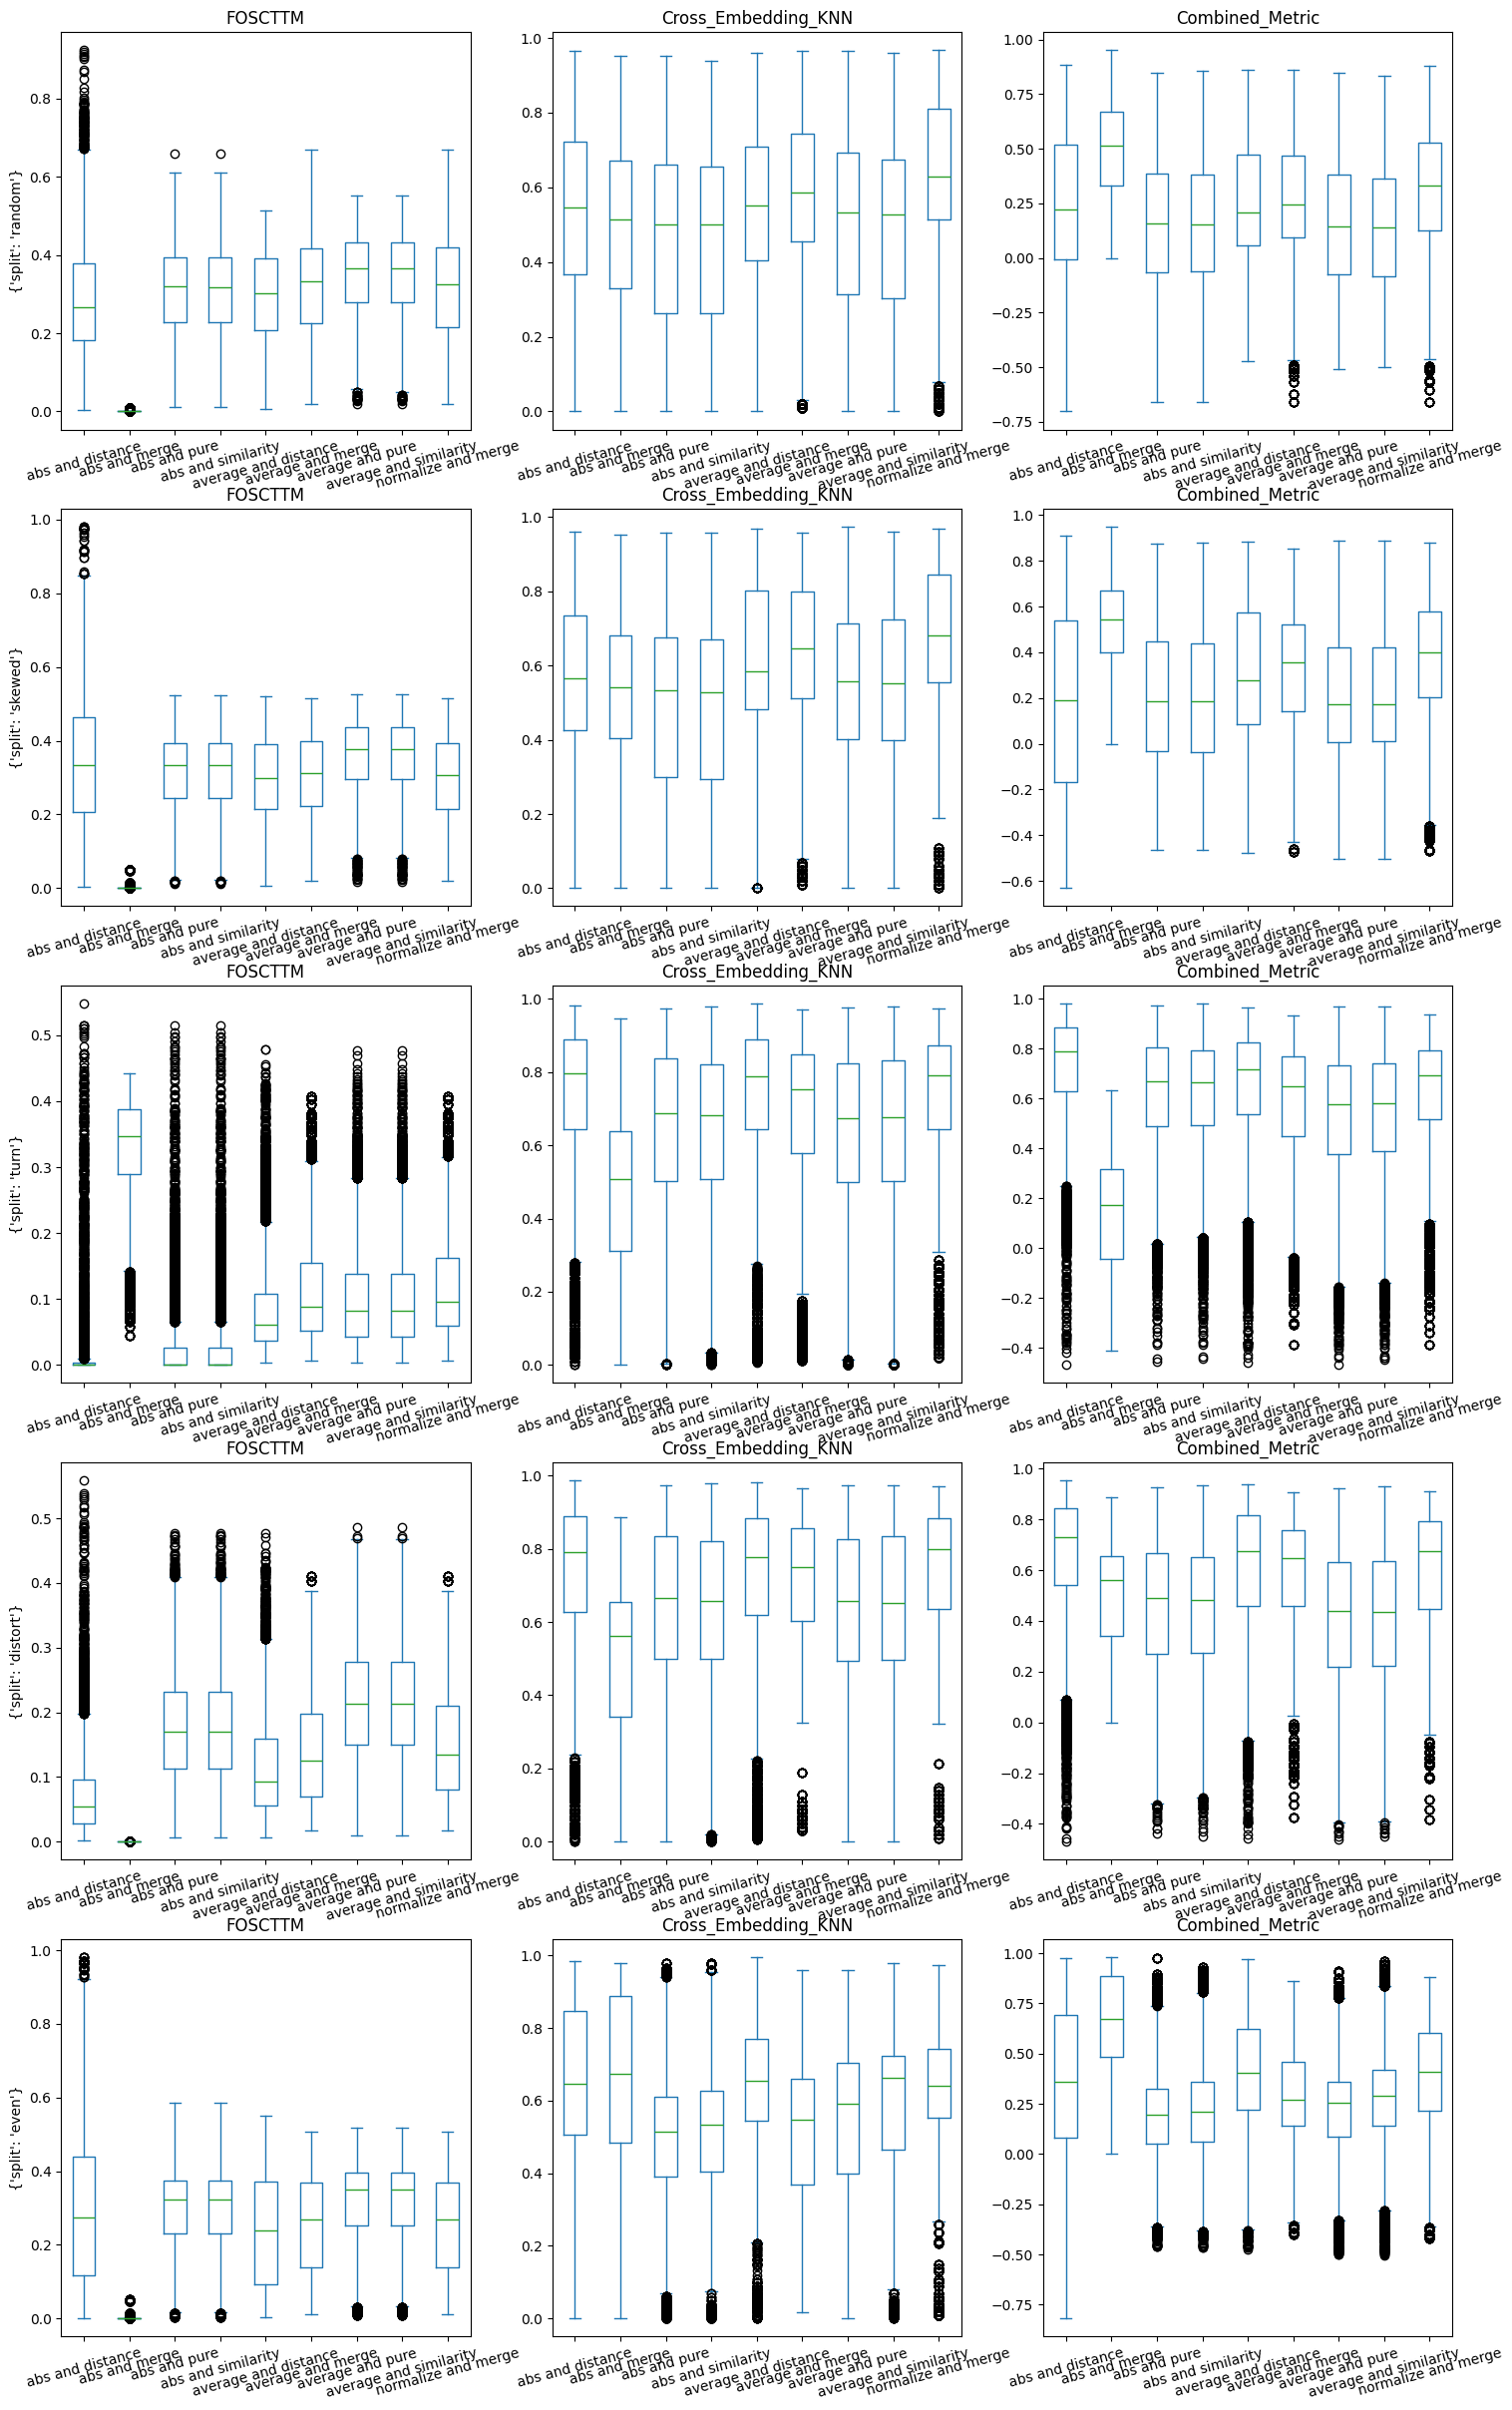

In [25]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine SPUD argumenst
df_sub = subset_df(df, method = "SPUD")
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         },
         {"split" : "distort" #, "csv_file" : "iris"
         }, 
        {"split" : "even"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [26]:
#Working on class

In [7]:
def plt_methods_by_CSV_max(df = df, sort_by = "DIG", metric = "Combined_Metric", return_df =False, plot_methods = ["SSMA", "MAGAN", "DTA", "SPUD_D", "SPUD_M", "DIG", "CwDIG", "NAMA", "PCR", "JLMA", "Split_A", "Split_B"]):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].max(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].max(),
        'SPUD_D': df[df["SPUDS_Algorithm"]== "distance"].groupby("csv_file")[metric].max(),
        'SPUD_M': df[df["SPUDS_Algorithm"] == "merge"].groupby("csv_file")[metric].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].max(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].max(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].max(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].max(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].max(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index - 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }

    plt.figure(figsize=(16, 6))
    
    if "DIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    if "MAGAN" in plot_methods:
        ax = plt.scatter(y = agregate_df["MAGAN"], marker = 'h', label = "MAGAN", **key_words)
    if "JLMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["JLMA"], marker = '_', label = "JLMA", **key_words)
    if "SPUD_D" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_D"], label = "SPUD_D", **key_words)
    if "Split_A" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_A"], marker = '.', label = "Split A", **key_words)

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index + 0.1,
                "s" : 50,
                "alpha" : .90,
                #"edgecolor" : "black",
                #"linewidth": 0.5,
                #"facecolor": "None"
                }
    if "CwDIG" in plot_methods:
        ax = plt.scatter(y = agregate_df["CwDIG"], marker = '^', label = "CwDIG", **key_words)
    if "NAMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)
    if "PCR" in plot_methods:
        ax = plt.scatter(y = agregate_df["PCR"], marker = 'v', label = "Procrutees", **key_words)
    if "DTA" in plot_methods:
        ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    if "SPUD_M" in plot_methods:
        ax = plt.scatter(y = agregate_df["SPUD_M"], label = "SPUD_M", **key_words)
    if "SSMA" in plot_methods:
        ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words) 
    if "Split_B" in plot_methods:
        ax = plt.scatter(y = agregate_df["Split_B"], marker = '.', label = "Split B", **key_words)


    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MAX)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

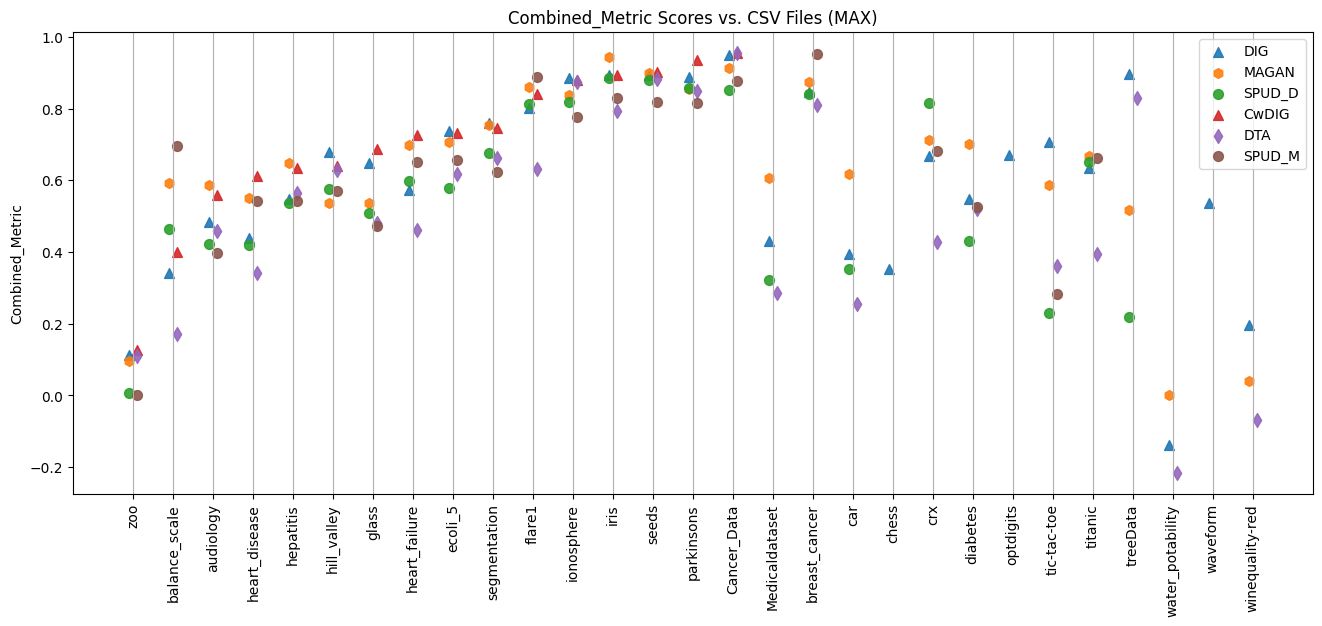

In [8]:
#plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Combined_Metric", sort_by="CwDIG", plot_methods = ["MAGAN", "DTA", "DIG", "SPUD_D", "SPUD_M", "CwDIG"])

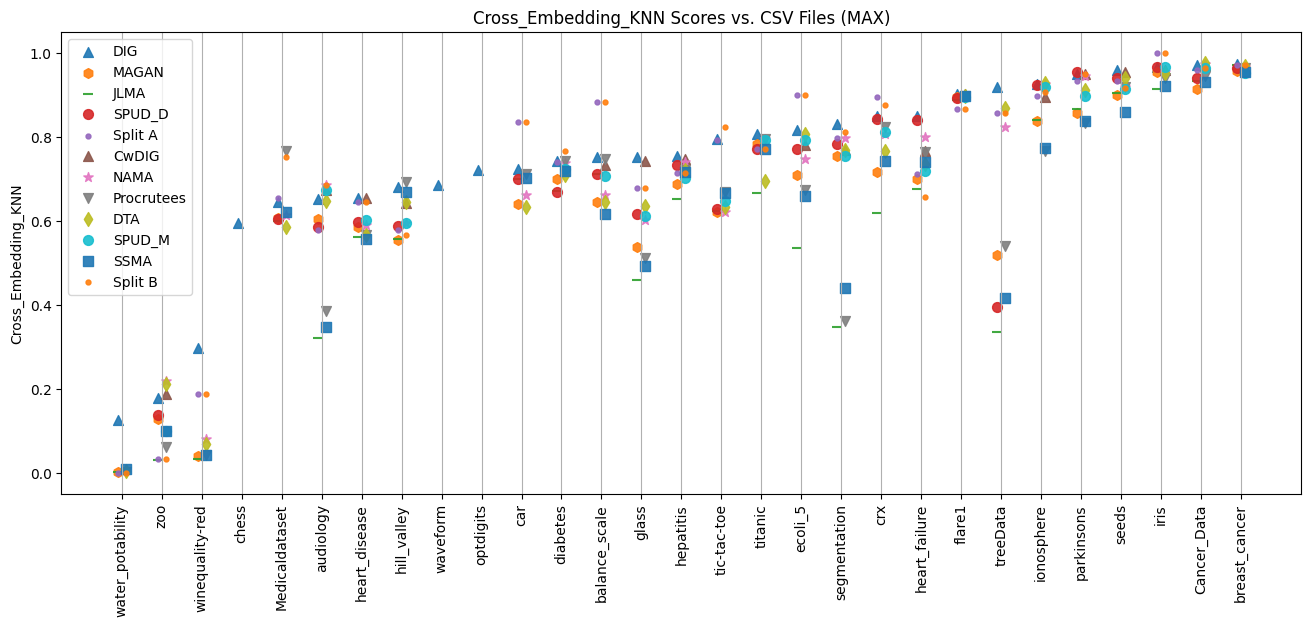

In [9]:
plt_methods_by_CSV_max(df = subset_df(df, split = "random"), metric = "Cross_Embedding_KNN", sort_by="DIG")

In [6]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", metric = "Combined_Metric", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].mean(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].mean(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].mean(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].mean(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].mean(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].mean(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")[metric].std(),
        'MAGAN': df[df["method"] == "MAGAN"].groupby("csv_file")[metric].std(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")[metric].std(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")[metric].std(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")[metric].std(),
        'CwDIG': df[df["method"] == "CwDIG"].groupby("csv_file")[metric].std(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")[metric].std(),
        'JLMA': df[df["method"] == "JLMA"].groupby("csv_file")[metric].std(),
        'PCR': df[df["method"] == "PCR"].groupby("csv_file")[metric].std(),
        'Split_A': df.groupby("csv_file")["A_Classification_Score"].std(),
        'Split_B': df.groupby("csv_file")["B_Classification_Score"].std()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = ".", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = ".", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '.', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["CwDIG"], yerr = err_df["CwDIG"],fmt = '.', label = "CwDIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = '.', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '.', label = "NAMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.3, y = agregate_df["MAGAN"], yerr = err_df["MAGAN"],fmt = '.', color = "black", label = "MAGAN", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["JLMA"], yerr = err_df["JLMA"], fmt = ".", label = "JMLA", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.3, y = agregate_df["PCR"], yerr = err_df["PCR"], fmt = ".", label = "Procrustees", **key_words) 




    ax = plt.errorbar(x = agregate_df.index+ 0.4, y = agregate_df["Split_A"], yerr = err_df["Split_A"], fmt = "_", label = "Split_A", **key_words) 
    ax = plt.errorbar(x = agregate_df.index - 0.4, y = agregate_df["Split_B"], yerr = err_df["Split_B"], fmt = "_", label = "Split_B", **key_words) 


    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"{metric} Scores vs. CSV Files (MEAN)")
    plt.ylabel(metric)
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

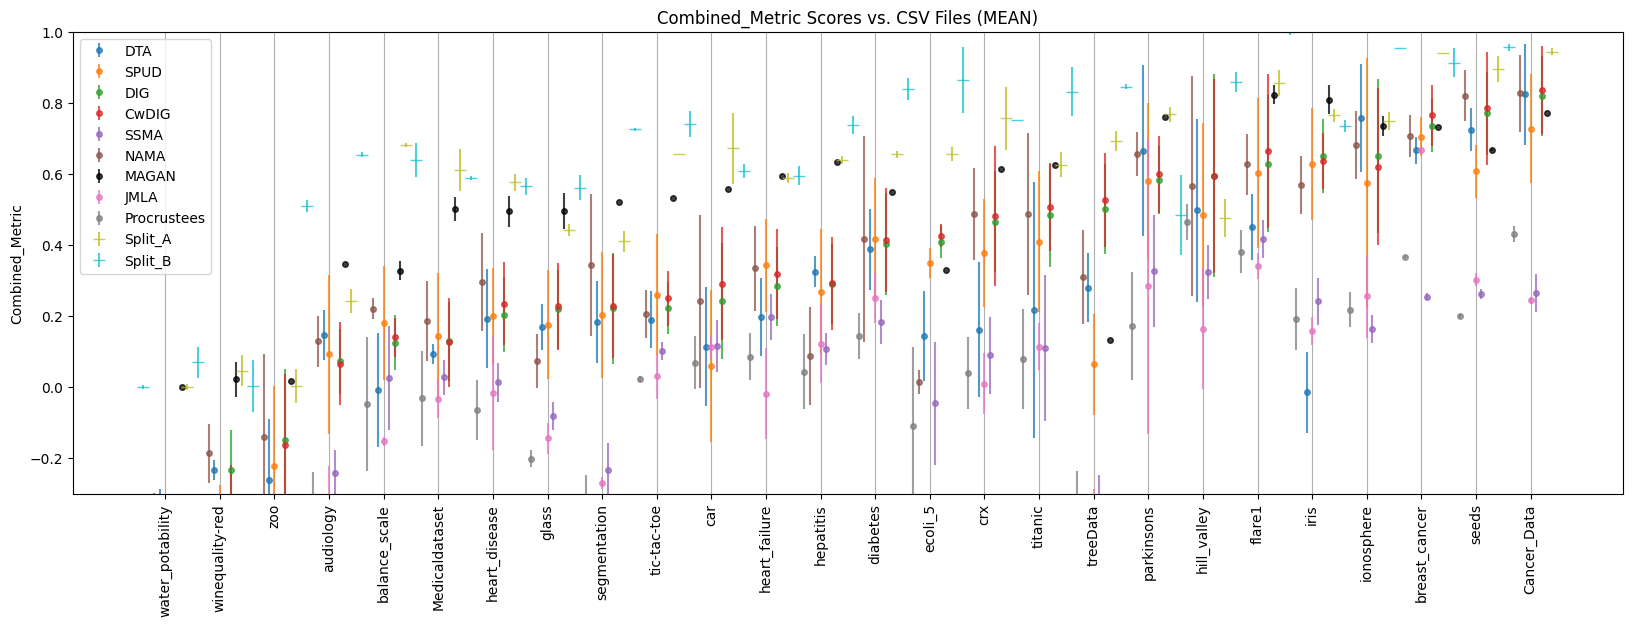

In [11]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "skewed"), metric = "Combined_Metric", sort_by="DIG")

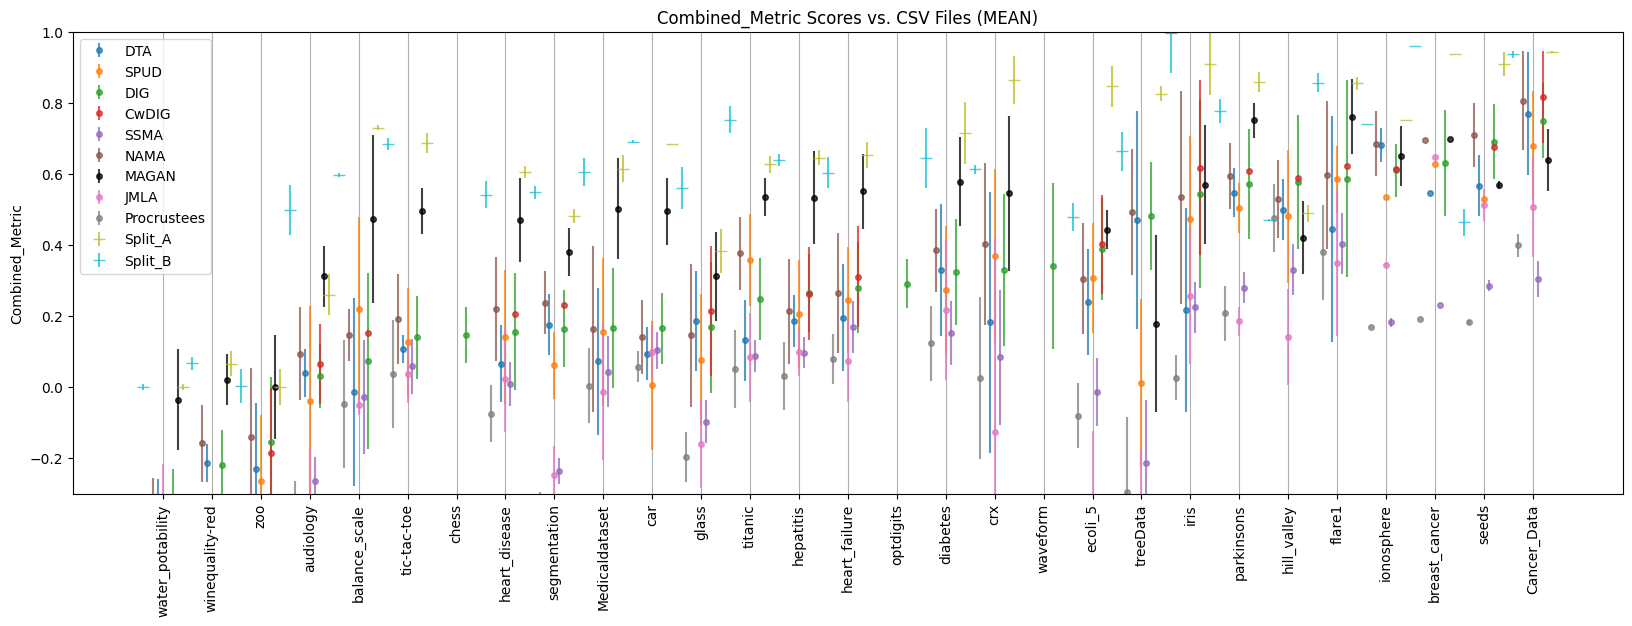

In [12]:
plt_methods_by_CSV_mean(df = subset_df(df, split = "random"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [13]:
#Veiw the files that have mising values. We won't include them in the rankings
plt_methods_by_CSV_max(df = df, return_df=True).drop(columns= ["csv_file", "Split_A", "Split_B"]).rank(ascending=False, method='max', axis = 1)

,SSMA,MAGAN,DTA,SPUD_D,SPUD_M,DIG,CwDIG,NAMA,PCR,JLMA
0,6.0,7.0,9.0,4.0,5.0,3.0,8.0,2.0,10.0,1.0
1,4.0,8.0,2.0,5.0,10.0,3.0,6.0,7.0,1.0,9.0
2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,6.0,10.0,2.0,4.0,8.0,3.0,9.0,7.0,1.0,5.0
4,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,7.0,2.0,9.0,6.0,1.0,5.0,3.0,4.0,8.0,10.0
6,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,4.0,9.0,6.0,8.0,7.0,2.0,3.0,5.0,1.0,10.0
8,8.0,9.0,1.0,6.0,10.0,3.0,4.0,5.0,2.0,7.0
9,3.0,8.0,10.0,6.0,7.0,2.0,9.0,5.0,1.0,4.0


In [14]:
def get_ranks(show_more = False, **kwargs):
    #The amount of comparisions
    NUM = 10

    #Sort by Split
    split_df = subset_df(df=df, **kwargs)

    if "split" in kwargs.keys():
        split = kwargs["split"]
    else:
        split = "No"

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    csv_df = csv_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()
    df_ranked = csv_df.rank(ascending=False, method='max', axis = 1)

    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0).sort_values(ascending=True)}")
    if show_more:
        print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0).sort_values(ascending=True)}")
        print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.idxmax(axis = 1).value_counts().sort_values(ascending=False)}")
    #print(f"\n \nDistance from Split_A and Split_B with a {split} Split\n----------------------------------------------------------\n{df_ranked[""].std(axis = 0).sort_values(ascending=True)}")

    #Get the csv file with Cross embedding as the max
    csv_df2 = plt_methods_by_CSV_max(df = split_df, return_df=True, metric = "Cross_Embedding_KNN").dropna()
    d1 = len(csv_df2)
    columns = csv_df2.columns[1:-2]

    #Add their Overall value
    print(f"\n  Combined Metric Scores\n------------------------------------------------------------------------------")
    print(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    #Drop the SPlits from the df
    methods_df = csv_df2.drop(columns=["csv_file", "Split_A", "Split_B"])

    #Create the baseline Scalar, and drop NaN
    baseline = np.reshape(csv_df2.values[:, -2:].max(axis = 1), newshape = (d1,1))

    #Print out average
    print(f"\n\n\n          Distance of CE from Split A and Split B baseline on Average\n------------------------------------------------------------------------------")

    #Calculate the values and print their rank underneath
    print(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy() - baseline, axis = 0), newshape = (1,NUM)), columns = columns)._append(pd.DataFrame(np.reshape(np.mean(methods_df.to_numpy(), axis = 0), newshape = (1,NUM)), columns = columns).rank(ascending=False, method='max', axis = 1)))

    if show_more:
        print(f"\n\n\n               Distance of CE from Split A and Split B baseline\n------------------------------------------------------------------------------")

        #Calculate the values
        print(pd.DataFrame(methods_df.to_numpy() - baseline, columns = columns, index = csv_df2["csv_file"]))



In [15]:
#NOTE: DIG has the best Preformance :) --> The Rankings reflect often how well each will be away from the main one
get_ranks(show_more = True)

Ranked across No Split
-----------------------
DIG       2.857143
DTA       3.035714
SPUD_D    4.571429
PCR       5.107143
JLMA      5.285714
NAMA      5.357143
CwDIG     5.821429
SSMA      6.964286
SPUD_M    8.000000
MAGAN     8.071429
dtype: float64

 
STD of Ranks across No Split
----------------------------
DIG       1.353029
NAMA      1.704336
MAGAN     1.824292
SPUD_D    1.834415
SPUD_M    2.125681
SSMA      2.284929
PCR       2.806597
CwDIG     2.893845
JLMA      2.916837
DTA       2.999780
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA       14
DIG        5
PCR        4
SPUD_D     2
JLMA       1
SPUD_M     1
CwDIG      1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA      MAGAN       DTA    SPUD_D    SPUD_M      DIG     CwDIG  \
0  0.72767   0.706994  0.794784  0.797529  0.739028  0.81789  0.746155   
0  9.0000

In [16]:
get_ranks(split = "random", seed = "1738") #Seeds:  42, 1738, 1825, 2830, 3407, 3430, 5198, 7667, 9515

Ranked across random Split
-----------------------
CwDIG     2.363636
DIG       2.545455
MAGAN     3.000000
DTA       4.818182
NAMA      4.818182
SPUD_M    5.090909
SPUD_D    5.363636
SSMA      8.636364
JLMA      8.727273
PCR       9.636364
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA   SPUD_D    SPUD_M     DIG    CwDIG     NAMA  \
0  0.172369  0.546437  0.458594  0.46763  0.505712  0.5611  0.59168  0.47807   
0  8.000000  3.000000  7.000000  6.00000  4.000000  2.0000  1.00000  5.00000   

         PCR      JLMA  
0   0.075237  0.118532  
0  10.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0 -0.175096 -0.167433 -0.088239 -0.092047 -0.086522 -0.031095 -0.055013   
0       8.0       7.0

In [17]:
get_ranks(show_more = True, split = "even")

Ranked across even Split
-----------------------
CwDIG     1.444444
DIG       2.888889
NAMA      4.277778
SPUD_M    4.666667
SPUD_D    5.000000
MAGAN     5.333333
DTA       5.555556
SSMA      8.277778
JLMA      8.444444
PCR       9.111111
dtype: float64

 
STD of Ranks across even Split
----------------------------
CwDIG     0.704792
SSMA      1.017815
JLMA      1.149026
NAMA      1.274434
DIG       1.367217
SPUD_D    1.455214
DTA       1.976992
PCR       2.193276
SPUD_M    2.275186
MAGAN     2.566756
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
CwDIG     12
SPUD_M     3
DIG        2
PCR        1
Name: count, dtype: int64

  Combined Metric Scores
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0  0.28393  0.581261  0.561853  0.626534  0.673466  0.685168  0.742899   
0  9.00000  6.000000  7.000000  5.000000  3.

In [18]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
CwDIG     1.65
DIG       3.10
SPUD_M    3.25
NAMA      4.30
MAGAN     4.60
DTA       5.60
SPUD_D    5.85
SSMA      8.40
JLMA      8.65
PCR       9.60
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D   SPUD_M       DIG     CwDIG  \
0  0.269356  0.581984  0.513644  0.554707  0.68207  0.666281  0.703943   
0  8.000000  5.000000  7.000000  6.000000  2.00000  3.000000  1.000000   

       NAMA        PCR      JLMA  
0  0.585547   0.180596  0.238697  
0  4.000000  10.000000  9.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D    SPUD_M       DIG     CwDIG  \
0 -0.148801 -0.194184 -0.070445 -0.044026 -0.035338  0.004301 -0.009841   
0       7.0      10.0       6.0       4.0       3

In [19]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
DTA       1.5625
DIG       3.5000
JLMA      3.6250
CwDIG     4.2500
NAMA      4.3125
SPUD_D    4.7500
MAGAN     7.1250
SPUD_M    7.5000
PCR       9.1250
SSMA      9.2500
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA    MAGAN      DTA    SPUD_D    SPUD_M       DIG    CwDIG  \
0  0.566424  0.69841  0.84068  0.788597  0.700393  0.802157  0.79848   
0  9.000000  8.00000  1.00000  6.000000  7.000000  2.000000  4.00000   

       NAMA        PCR      JLMA  
0  0.790326   0.563499  0.800032  
0  5.000000  10.000000  3.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA    SPUD_D   SPUD_M       DIG     CwDIG  \
0 -0.058025 -0.061473  0.100935  0.055336  0.01873  0.057295  0.045109   
0       9.0      10.0       1.0     

In [20]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
DTA       1.666667
DIG       3.066667
CwDIG     3.933333
SPUD_D    4.000000
PCR       4.266667
NAMA      5.933333
SSMA      6.133333
MAGAN     8.066667
SPUD_M    8.266667
JLMA      9.800000
dtype: float64

  Combined Metric Scores
------------------------------------------------------------------------------
       SSMA     MAGAN       DTA   SPUD_D    SPUD_M      DIG     CwDIG  \
0  0.787364  0.730566  0.870132  0.83311  0.738404  0.84891  0.838629   
0  7.000000  9.000000  1.000000  5.00000  8.000000  2.00000  4.000000   

       NAMA       PCR       JLMA  
0  0.820232  0.841422   0.395557  
0  6.000000  3.000000  10.000000  



          Distance of CE from Split A and Split B baseline on Average
------------------------------------------------------------------------------
      SSMA     MAGAN       DTA   SPUD_D    SPUD_M       DIG     CwDIG  \
0  0.02002 -0.046501  0.112186  0.06377  0.033195  0.073331  0.060798   
0      8.0       9

### Simple Ranking

In [103]:
def get_avg_df(split = "all"):
    #Sort by Split

    #Add the values of all the dfs together
    if split == "all":
        #Create the base set
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = "turn"), return_df=True)

        for s_type in ["distort", "even", "skewed", "random"]:
            #Add each of the sets to the dataframe
            split_df = split_df._append(plt_methods_by_CSV_max(df = subset_df(df=df, split = s_type), return_df=True))

    else:
        #Create the df 
        split_df = plt_methods_by_CSV_max(df = subset_df(df=df, split = split), return_df=True)

    #Drop unneeded columns
    csv_df = split_df.drop(columns= ["csv_file", "Split_A", "Split_B"]).dropna()

    #Create csv df
    csv_df = (pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns)._append(pd.DataFrame(np.reshape(np.mean(csv_df.to_numpy(), axis = 0), newshape = (1,10)), columns = csv_df.columns).rank(ascending=False, method='max', axis = 1))).reset_index().sort_values(by = 0, ascending = False, axis=1).drop(columns = ["index"])

    #Rename the index
    csv_df.index = [split, "rankings"]

    return csv_df
    

In [104]:
def find_df_differences(split = "all"):
    df = get_avg_df(split).head(1)

    #Save the df columns
    columns = df.columns

    #Convert to numpy array
    array = df.to_numpy()

    #Get the max values
    max_values = np.max(array, axis=1, keepdims=True)

    #Subtract the values
    result = max_values - array

    #return as df
    return pd.DataFrame(result, columns = columns)

<Axes: >

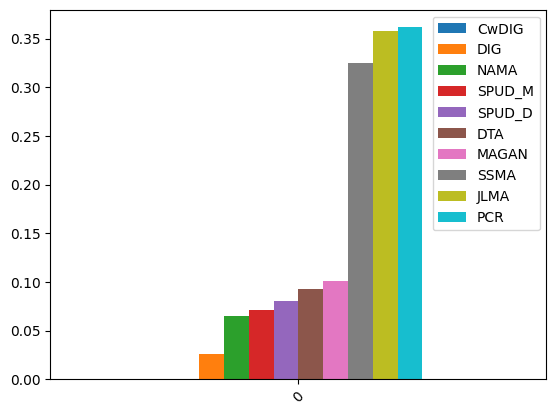

In [109]:
find_df_differences(split = "all").plot(kind = "bar", rot = 45)

<Axes: >

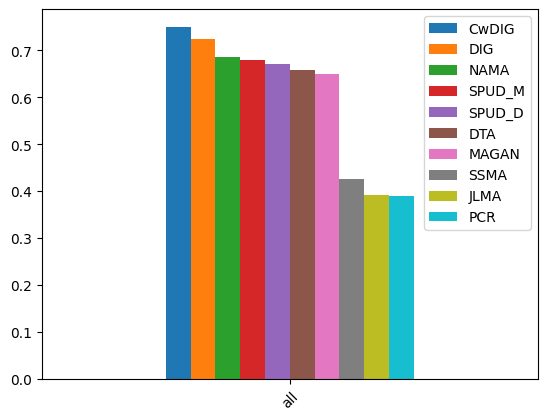

In [110]:
get_avg_df().head(1).plot(kind = "bar", rot = 90)

In [108]:
get_avg_df(split = "random")

,CwDIG,MAGAN,DIG,NAMA,SPUD_M,SPUD_D,DTA,SSMA,JLMA,PCR
random,0.704866,0.688924,0.665235,0.653429,0.635205,0.618989,0.592825,0.32256,0.312995,0.273505
rankings,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.00000,9.000000,10.000000


In [88]:
get_avg_df(split = "skewed")

,CwDIG,SPUD_M,DIG,MAGAN,NAMA,SPUD_D,DTA,SSMA,JLMA,PCR
0,0.691915,0.661568,0.654813,0.580806,0.57153,0.54161,0.498411,0.25953,0.230822,0.177402
1,1.000000,2.000000,3.000000,4.000000,5.00000,6.00000,7.000000,8.00000,9.000000,10.000000


In [89]:
get_avg_df(split = "even")

,CwDIG,DIG,SPUD_M,NAMA,SPUD_D,MAGAN,DTA,JLMA,SSMA,PCR
0,0.742899,0.685168,0.673466,0.642235,0.626534,0.581261,0.561853,0.286007,0.28393,0.205005
1,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.00000,10.000000


In [90]:
get_avg_df(split = "distort")

,DTA,DIG,JLMA,CwDIG,NAMA,SPUD_D,SPUD_M,MAGAN,SSMA,PCR
0,0.84068,0.802157,0.800032,0.79848,0.790326,0.788597,0.700393,0.69841,0.566424,0.563499
1,1.00000,2.000000,3.000000,4.00000,5.000000,6.000000,7.000000,8.00000,9.000000,10.000000


In [92]:
find_df_differences(split = "distort")

,DTA,DIG,JLMA,CwDIG,NAMA,SPUD_D,SPUD_M,MAGAN,SSMA,PCR
0,0.0,0.038523,0.040648,0.0422,0.050354,0.052083,0.140287,0.14227,0.274257,0.277181


In [91]:
get_avg_df(split = "turn")

,DTA,DIG,PCR,CwDIG,SPUD_D,NAMA,SSMA,SPUD_M,MAGAN,JLMA
0,0.870132,0.84891,0.841422,0.838629,0.83311,0.820232,0.787364,0.738404,0.730566,0.395557
1,1.000000,2.00000,3.000000,4.000000,5.00000,6.000000,7.000000,8.000000,9.000000,10.000000


#### Plotting these simple rankings 

In [122]:
def plot_simple_ranks():
    #Create a dataframe to add too:
    df = get_avg_df().head(1)

    #Add all the other dfs
    for kind in ["random", "skewed", "even", "distort", "turn"]:
        df = df._append(get_avg_df(split = kind).head(1))
    
    
    return df.plot(kind = "bar", rot = 0, figsize = (17, 6))


<Axes: >

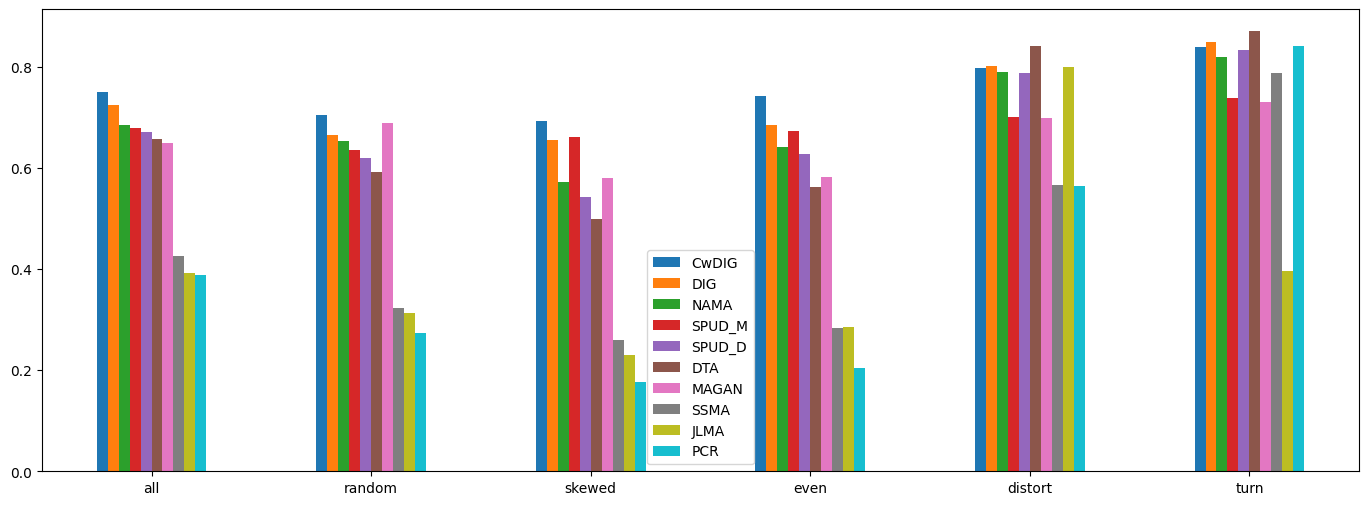

In [123]:
plot_simple_ranks()

## Comparing Parameters across all methods

### KNN and Percent of Anchors

In [21]:
def line_plot_methods(argument = "Percent_of_Anchors", metric = "Combined_Metric",   **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)[metric].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)[metric].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)[metric].mean(), label = "DIG")
    plt.plot(df_subset[df_subset["method"] == "CwDIG"].groupby(argument)[metric].mean(), label = "CwDIG")
    plt.plot(df_subset[df_subset["method"] == "JLMA"].groupby(argument)[metric].mean(), label = "JLMA")
    plt.plot(df_subset[df_subset["method"] == "MAGAN"].groupby(argument)[metric].mean(), label = "MAGAN")
    plt.plot(df_subset[df_subset["method"] == "PCR"].groupby(argument)[metric].mean(), label = "Procrustees")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)[metric].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)[metric].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)[metric].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel(metric)
    plt.legend()
    plt.title("Methods Together")

In [22]:
df[df["Operation"] == "average"].groupby("Percent_of_Anchors")["Cross_Embedding_KNN"]

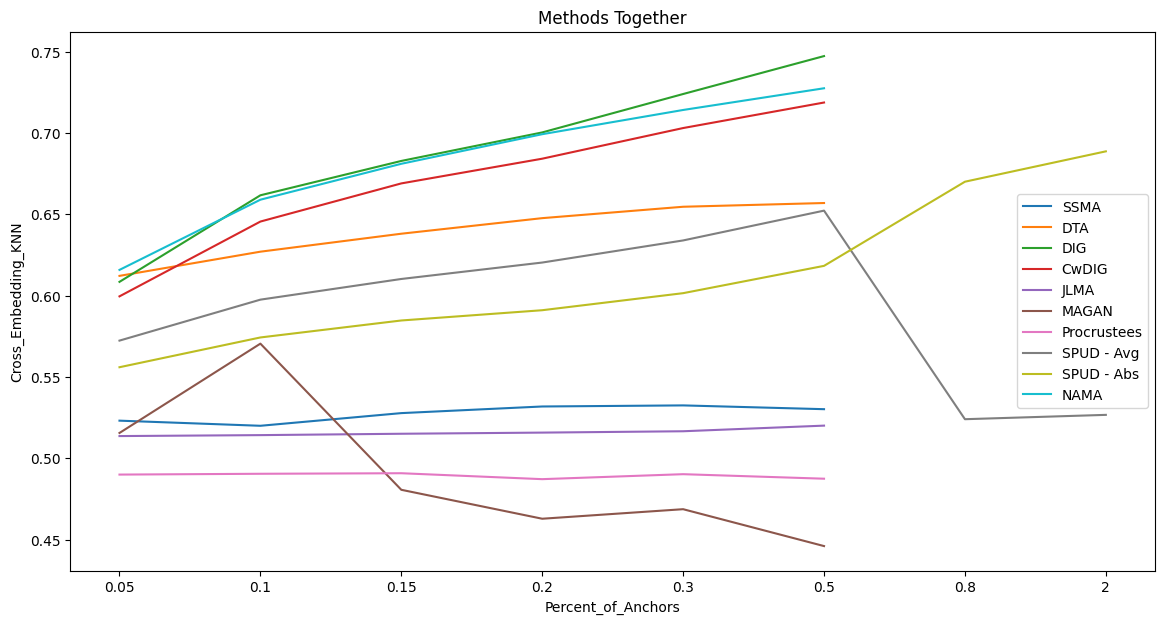

In [23]:
line_plot_methods(metric = "Cross_Embedding_KNN")

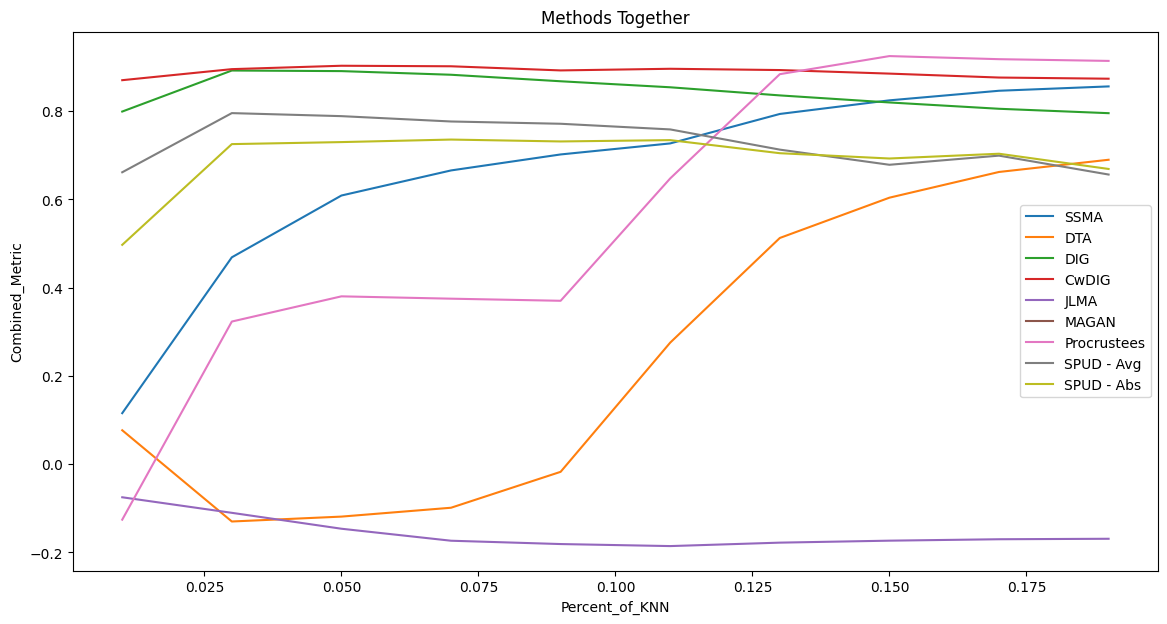

In [24]:
line_plot_methods(argument = "Percent_of_KNN", split = "turn", csv_file = "iris")

### Sparse Data comparison

#### Set Up

In [25]:
from SPUD import SPUD
from DIG import DIG
import random

In [26]:
sparse_dc = tma.test_manifold_algorithms(csv_file="iris.csv", split= "skewed", percent_of_anchors= [0.8], verbose=2, random_state=42)

#Randomly select points
import random
random_points = random.sample(range(len(sparse_dc.split_A)), k = int(len(sparse_dc.split_A)/10))

#Create the macthing anchors
sparse_dc.anchors = np.array([range(int(len(sparse_dc.split_A)/10)), random_points]).T

#Subset split A to only have some of the points
sparse_dc.split_A = sparse_dc.split_A[random_points]

#Create labels
sparse_labels = np.hstack([sparse_dc.labels[random_points], sparse_dc.labels])


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

Splitting the data in a skewed fashion
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


In [27]:
sparse_dc.anchors

array([[  0, 128],
       [  1,  45],
       [  2, 129],
       [  3,  27],
       [  4,  76],
       [  5,  50],
       [  6,  39],
       [  7,  95],
       [  8,  41],
       [  9, 138],
       [ 10, 135],
       [ 11,   0],
       [ 12,  82],
       [ 13, 125],
       [ 14,   4]])

#### Sparse DIG

In [28]:
sparse_DIG = DIG(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors[:2], DTM = "log", knn = 10)

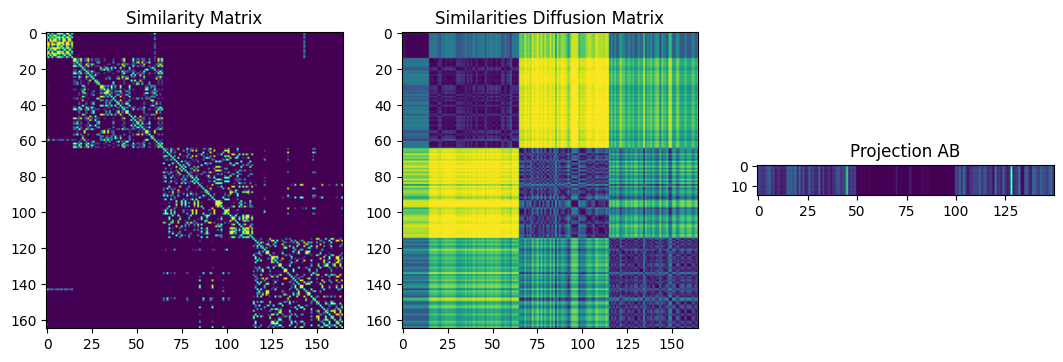

In [29]:
sparse_DIG.plot_graphs()

Model Stress: 0.7924459683656078
Cross Embedding: 0.3333333333333333
Can't compute FOSCTTM with different domain shapes.


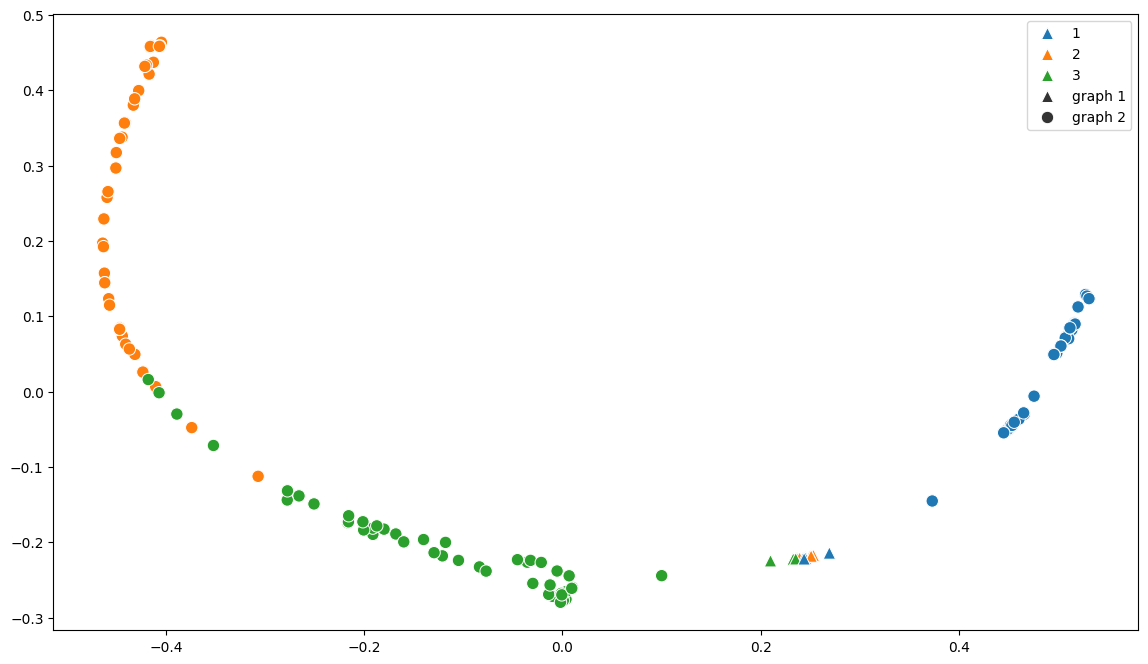

In [30]:
sparse_DIG.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

#### Sparse SPUD

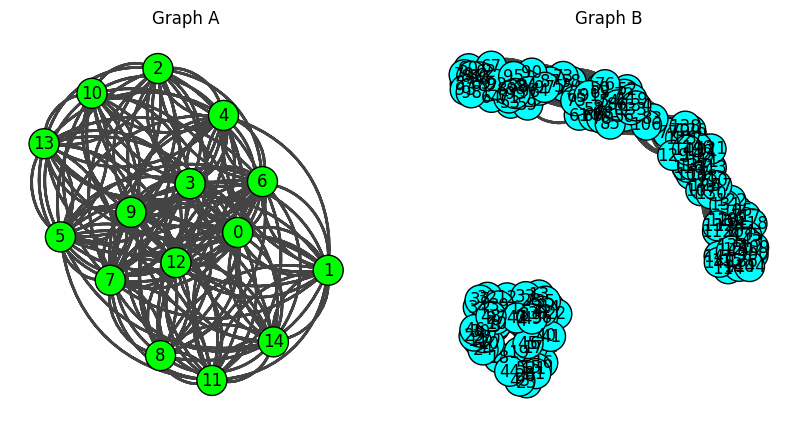

In [31]:
sparse_spud = SPUD(sparse_dc.split_A, sparse_dc.split_B, sparse_dc.anchors[:2], operation = "average", knn = 10)
sparse_spud.plot_graphs()

Model Stress: 52.71836362414267
Cross Embedding: 0.96
Can't compute FOSCTTM with different domain shapes.


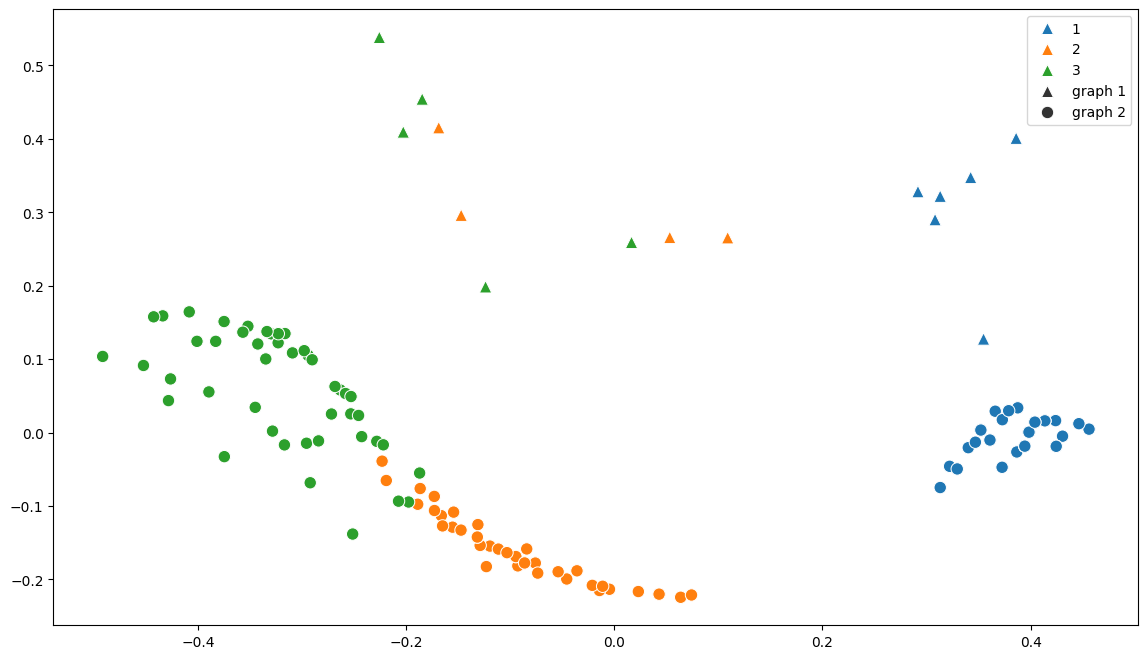

In [32]:
sparse_spud.plot_emb(sparse_labels, show_lines = False, show_anchors = False)

## Plotting the Embeddings

Data Sets that dont make sense:
Flare1 - Most of the points belong to the same class, so the CE will be high regardless of alignment

In [33]:
visual_test = tma.test_manifold_algorithms(csv_file="ecoli_5.csv", split= "even", percent_of_anchors= [0.1], verbose=2)


 
 
---------------------------       Initalizing class with ecoli_5.csv data       ---------------------------

Spliting the data evenly
Split A features shape: (327, 4)
Split B Features shape (327, 3)
MDS initialized with 3 components
The knn values are: (2, 9, 16, 23, 30, 37, 44, 51, 58, 65)


Percent of anchors used: 0.1
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 4
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 40 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 67 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/yunity/arusty/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 100 dimensions on data with min(n_samples, 

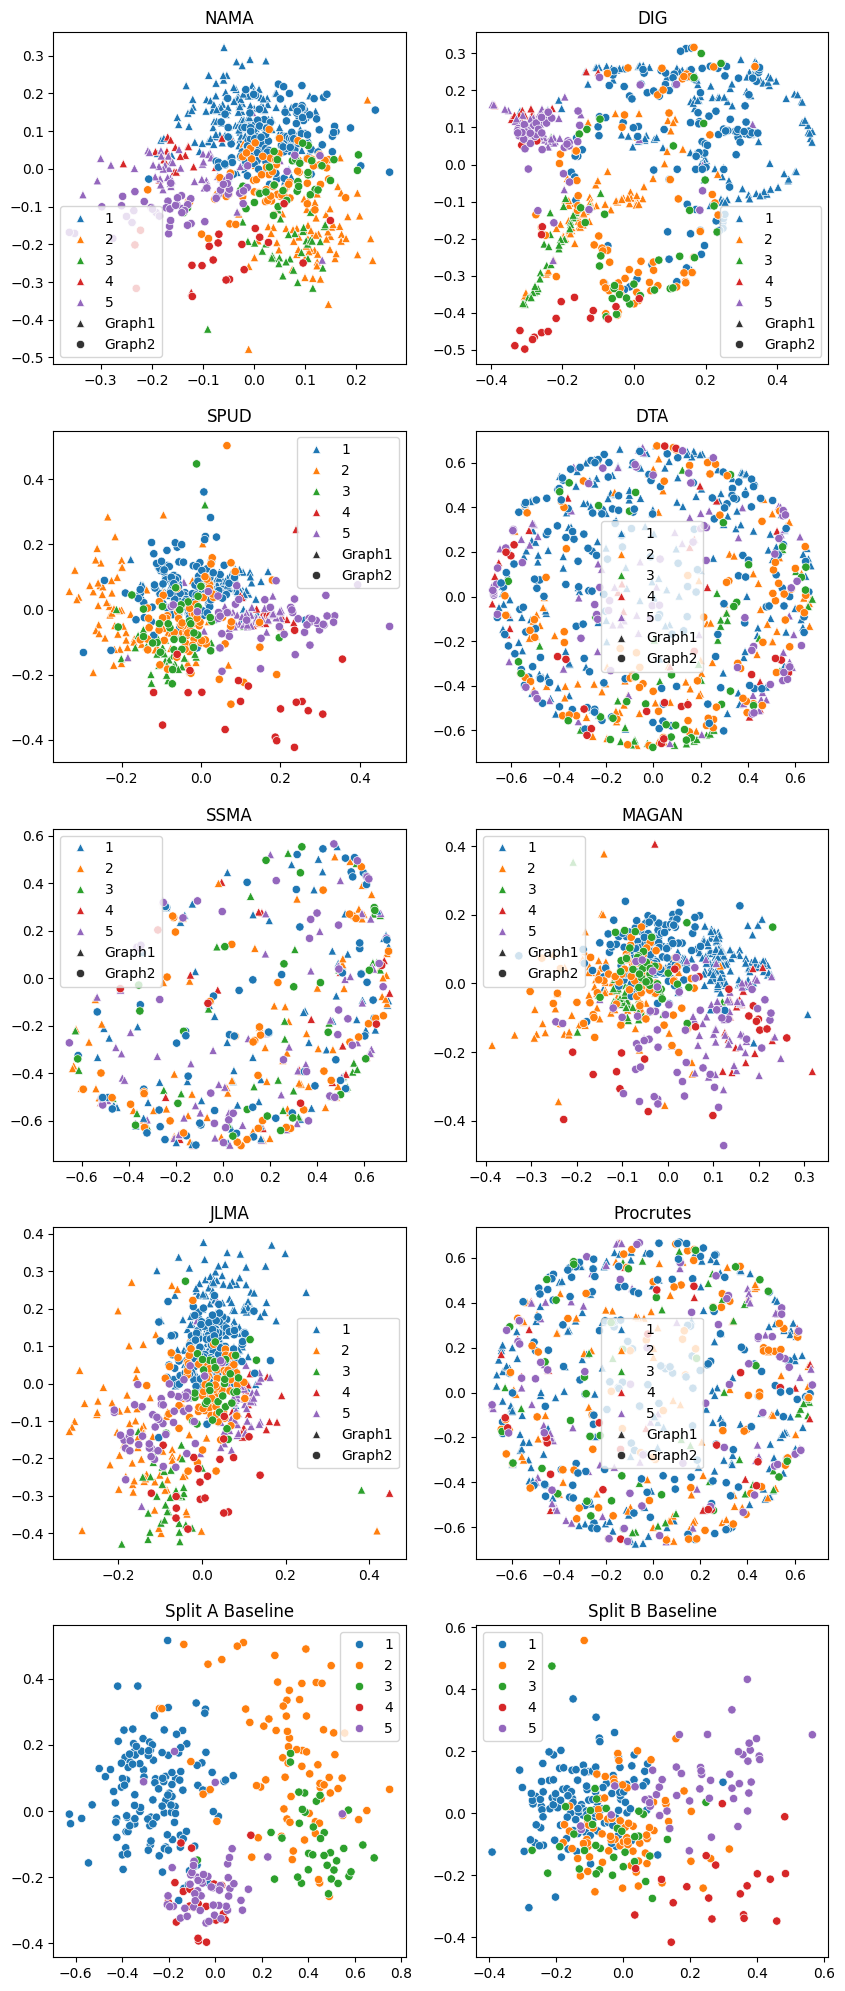

In [34]:
visual_test.plot_embeddings(knn = 5)

# Time Comparisions Below

In [35]:
#Print the complexity of CSV files and the time it takes
time_df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Time_DataFrame.csv").sort_values(by = str("iris.csv"), ignore_index=True)

#Add the amount of features for each csv file
for csv_file in time_df.columns:

    #Continue the loop if the header is Methods
    if csv_file == "Methods":

        #Create dictionaries to store feature count and instance count
        feature_dict = {"Methods" : 0}
        instance_dict = {"Methods" : "Feature Count"}
        complexity_dict = {"Methods" : "Complexity"}

        continue

    #Calulate the spcial cases
    elif csv_file == "S-curve":
        #Count Features
        feature_dict[csv_file] = 600

        #Count Instances
        instance_dict[csv_file] = 3
        complexity_dict[csv_file] = 1800

        continue

    #Calulate the spcial cases
    elif csv_file == "blobs":
        #Count Features
        feature_dict[csv_file] = 300

        #Count Instances
        instance_dict[csv_file] = 2
        complexity_dict[csv_file] = 600

        continue


    file_path = "/yunity/arusty/Graph-Manifold-Alignment/CSV Files/" + csv_file

    #Read file
    df2 = pd.read_csv(file_path)

    #Count Features
    feature_dict[csv_file] = len(df2)

    #Count Instances
    instance_dict[csv_file] = len(df2.columns)

    #Calculate complexity 
    complexity_dict[csv_file] = len(df2) * len(df2.columns)

#Append the Dictionaries
time_df = time_df._append(feature_dict, ignore_index=True)
time_df = time_df._append(instance_dict, ignore_index=True)
time_df = time_df._append(complexity_dict, ignore_index=True)


#Veiw the DataFrame
time_df.T.sort_values(by = 6).T

,Methods,zoo.csv,hepatitis.csv,iris.csv,audiology.csv,parkinsons.csv,seeds.csv,segmentation.csv,glass.csv,heart_disease.csv,...,titanic.csv,diabetes.csv,tic-tac-toe.csv,Medicaldataset.csv,treeData.csv,winequality-red.csv,car.csv,water_potability.csv,chess.csv,optdigits.csv
0,DIG,2.051146,3.673588,3.401358,6.11107,6.721155,6.336899,7.850724,5.886319,21.008766,...,79.618065,169.862753,247.272338,333.91487,606.335758,670.495568,623.620235,713.969006,2198.150119,2975.556961
1,SPUD,1.979575,3.642993,3.596051,6.817885,6.064839,5.099518,8.601908,8.767957,16.608557,...,49.325496,86.465402,183.209855,364.731992,365.956391,383.02885,473.174882,695.340593,1271.707261,2712.52794
2,SSMA,1.159722,4.248523,4.294494,6.804995,8.124955,11.139338,12.805081,14.13043,28.532746,...,76.844366,98.089042,276.15585,277.443343,506.298484,666.250582,750.995811,994.201673,1721.018906,2350.375657
3,DTA,1.541715,3.795742,4.622846,9.17517,9.272984,11.307132,11.840308,11.141553,35.958692,...,82.645041,202.853388,277.613282,298.365653,565.135435,698.865259,760.982209,306.629771,1741.178858,2519.571152
4,NAMA,2.732113,4.872489,6.227232,14.216228,16.270395,10.448334,15.465682,19.214126,45.309474,...,441.442726,627.065093,1195.106548,3039.580123,3976.05421,5446.704218,6871.173276,10911.287093,46112.782603,85038.966415
5,MAGAN,36.202,60.454023,72.027937,66.887187,63.486195,56.742175,42.748242,61.843572,41.687702,...,54.630012,60.786258,113.20653,27.341562,497.965705,32.816214,407.051648,653.820618,1225.276301,61.125
6,0,101.0,138.0,150.0,190.0,195.0,199.0,211.0,214.0,297.0,...,712.0,768.0,958.0,1319.0,1440.0,1599.0,1728.0,2011.0,3196.0,3823.0
7,Feature Count,18.0,16.0,5.0,68.0,23.0,8.0,20.0,10.0,14.0,...,8.0,9.0,10.0,9.0,61.0,12.0,7.0,11.0,37.0,65.0
8,Complexity,1818.0,2208.0,750.0,12920.0,4485.0,1592.0,4220.0,2140.0,4158.0,...,5696.0,6912.0,9580.0,11871.0,87840.0,19188.0,12096.0,22121.0,118252.0,248495.0


In [36]:
time_df.T.sort_values(by = 6).T.drop(columns = ["Methods"]).mean(axis = 1).sort_values()

7      21.433333
5     146.407922
1     234.785702
3     281.642362
2     287.123525
0     309.506167
6          820.4
4    5526.709339
8        23313.5
dtype: object